# key words
- regressor: LinearRegression, Ridge

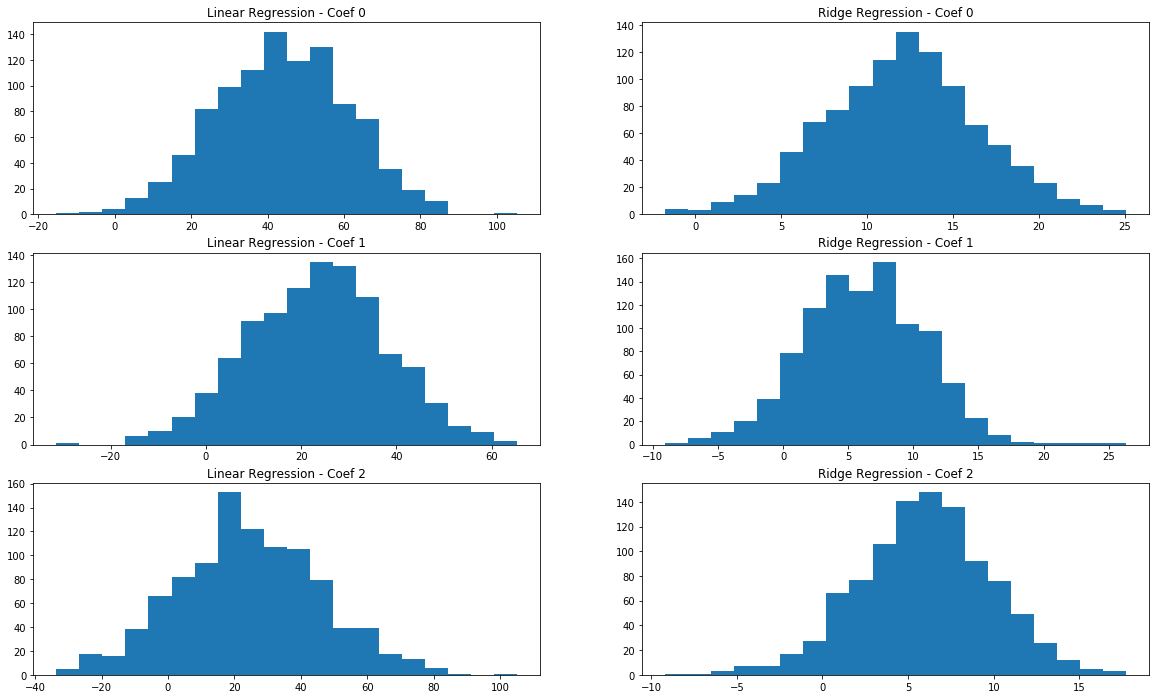

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets

from sklearn.linear_model import LinearRegression, Ridge

X_reg, y_reg = datasets.make_regression(n_samples=2000, n_features=3, effective_rank=2, noise=10)

n_bootstraps = 1000
len_X_reg = len(X_reg)
subsample_size = np.int(0.5 * len_X_reg)
subsample_idx = lambda: np.random.choice(np.arange(0, len_X_reg), size=subsample_size)

lr = LinearRegression()
coefs_reg = np.ones((n_bootstraps, 3))
for i in range(n_bootstraps):
    idx_reg_sub = subsample_idx()
    X_reg_sub = X_reg[idx_reg_sub]
    y_reg_sub = y_reg[idx_reg_sub]
    lr.fit(X_reg_sub, y_reg_sub)
    coefs_reg[i][0] = lr.coef_[0]
    coefs_reg[i][1] = lr.coef_[1]
    coefs_reg[i][2] = lr.coef_[2]

ridge = Ridge()
coefs_ridge = np.ones((n_bootstraps, 3))
for i in range(n_bootstraps):
    idx_reg_sub = subsample_idx()
    X_reg_sub = X_reg[idx_reg_sub]
    y_reg_sub = y_reg[idx_reg_sub]
    ridge.fit(X_reg_sub, y_reg_sub)
    coefs_ridge[i][0] = ridge.coef_[0]
    coefs_ridge[i][1] = ridge.coef_[1]
    coefs_ridge[i][2] = ridge.coef_[2]

# plot
plt.figure(figsize=(20, 12))
plt.tight_layout()

plt.subplot(321, title="Linear Regression - Coef 0")
plt.hist(coefs_reg[:, 0], bins=20)

plt.subplot(322, title="Ridge Regression - Coef 0")
plt.hist(coefs_ridge[:, 0], bins=20)

plt.subplot(323, title="Linear Regression - Coef 1")
plt.hist(coefs_reg[:, 1], bins=20)

plt.subplot(324, title="Ridge Regression - Coef 1")
plt.hist(coefs_ridge[:, 1], bins=20)

plt.subplot(325, title="Linear Regression - Coef 2")
plt.hist(coefs_reg[:, 2], bins=20)

plt.subplot(326, title="Ridge Regression - Coef 2")
plt.hist(coefs_ridge[:, 2], bins=20)

plt.show()